# Predictive Analytics for Daily Guest Counts

## Phase 1 Proposal

### Domain Understanding

For the domain understanding part of this project, I used my experience working at Tortillas since the summer of 2022. I've learned a lot about how restaurants work during this time. Also, because Tortillas is in a busy restaurant area, I know a lot about what happens in the neighborhood. I can easily talk to other restaurant workers to learn more. My boss at Tortillas also gave me some good ideas about what might affect how many guests we have, like PSV matches or Effenaar concerts. This helped me figure out what to look for when predicting guest numbers.

To see the full domain understanding, check Project Proposal.

### Data Sourcing

For data sourcing, I initially consulted with my boss at Tortillas to explore potential sources of data for my project. Unfortunately, the available data was limited. After two weeks of waiting, I received only the order deliveries data, which did not include sales data, essential for my intended analysis. Additionally, the order deliveries were aggregated on a weekly basis, making it challenging to make daily predictions accurately. The assumption that all purchases for the week corresponded to sales for that same week was not ideal, as sales could fluctuate daily. Furthermore, due to ethical and privacy concerns, accessing additional data, such as financial records, was not possible.

Despite these limitations, I realized that I could readily access data on the number of guests visiting Tortillas each day. While this dataset alone may seem insufficient, I recognized the potential to enrich it by incorporating external factors known to influence guest numbers. Factors such as weather conditions, local events, holidays, and special occasions could significantly impact restaurant traffic. With access to this data, I could enhance the complexity of my dataset and improve the accuracy of my predictive model.

#### Objectives and Target Audience

The primary objective of my project is to predict the number of guests visiting Tortillas restaurant each day. By doing so, I aim to assist restaurant management in making informed decisions regarding staffing levels, inventory management, and overall business strategy. The target audience for this project includes restaurant owners, managers, and staff who rely on accurate forecasts to optimize daily operations.

#### Data Characteristics

To achieve our objectives, I require structured data detailing the number of guests visiting Tortillas each day, preferably over a significant historical period to establish trends and patterns. Additionally, I will need unstructured data on external factors such as weather conditions, local events, and holidays. These datasets will provide the necessary context to enhance the predictive capabilities of our model.

#### Data Sources

The data on the number of guests visiting Tortillas each day can be sourced directly from the restaurant's records, provided by my boss. For external factors such as weather conditions and local events, I will need to search the internet or reach out to relevant organizations and authorities for accurate and up-to-date information. This may involve accessing public databases, APIs, or creating an own dataset collecting information from the calendar.

#### Version Control

To maintain version control for my data, I plan to start with a dataset spanning three months of historical guest counts and external factors. As I clean, preprocess, and augment the data, I will maintain a clear version history to ensure reproducibility and scalability. If the initial model proves successful, I will consider expanding the dataset and implementing more advanced version control practices to manage ongoing updates and improvements.

### Analytic Approach

In this phase, a specific goal and approach for the project are defined, focusing on predicting the number of guests visiting the restaurant. The objective is to determine the target variable, understand the nature of the problem, and identify key indicators within the dataset to facilitate accurate predictions.

#### 🎯 Target Variable:

The target variable for the predictive model is the number of guests visiting the restaurant on a given day. This variable represents the "thing" aimed to be predicted based on other features in the dataset. By forecasting the daily guest count, assistance can be provided to restaurant management in optimizing staffing levels, inventory management, and overall business strategy.

#### 🎨 Nature of the Problem:

The nature of the target variable determines the type of algorithm suitable for the predictive analytics model. In this case, it involves a regression problem as the aim is to predict a continuous numerical value – the daily guest count. Regression algorithms are well-suited for such problems as they can effectively estimate the relationship between input features and the target variable to make predictions.

#### 📍 Good Indicators:

To identify good indicators for predicting the daily guest count, exploratory data analysis (EDA) is conducted to uncover correlations between the target variable and other features in the dataset. By calculating correlation coefficients, the strength and direction of relationships between variables can be determined. Features exhibiting strong correlations with the number of guests serve as valuable indicators for the predictive model.

## Phase 2 Provisioning

### Data Requirements

For the Tortillas project, I use several datasets to add more features. These datasets include:

Guest Counts:
A dataset containing daily guest counts for Tortillas serves as the primary input. This data reveals the restaurant's foot traffic over time, essential for prediction.

Weather data:
Weather data are important for the tortillas industry, especially temperature and precipitation. These factors greatly influence consumer behavior and restaurants. Although temperature and precipitation are believed to have the most important effects, we will consider other climate variables to examine relationships and improve forecasts.

Effenaar Agenda:
An Effenaar agenda dataset lists upcoming events and concerts, including artist, venue, and date/time details. This dataset allows consideration of local events' impact on restaurant attendance.

PSV Matches:
Information about PSV matches, indicating home or away games and match types (e.g., Eredivisie, Champions League), is included. Sporting events draw crowds to the area, affecting restaurant traffic.

Other:
Consideration of additional factors affecting restaurant attendance, such as holidays, local festivals, promotions, or community events, is imperative. While these data may not be readily accessible, it is essential to explore avenues for integrating relevant information into the analysis.

#### Data dictionary

| Data Element Name | Data Type  | Units        | Range      | Description                        | Source             | Quality Standards                             | Notes                            |
|-------------------|------------|--------------|------------|------------------------------------|--------------------|-----------------------------------------------|----------------------------------|
| Guest Counts      | Numerical  | Guests       | 0 to 250     | Daily count of restaurant guests   | Internal database  |                |                                  |
| Temperature       | Numerical  | Celsius (°C) | -10 to 35  | Temperature in degrees Celsius     | KNMI       |                 |                                  |
| Rain     | Numerical  | Millimeters  | 0 to ∞     | Amount of precipitation            | KNMI        |                    |
| Wind Speed        | Numerical  | Meters/second| 0 to 20     | Speed of wind                      |KNMI        |                  |                                  |
| Effenaar Agenda   | Categorical| N/A          | N/A        | Upcoming events at Effenaar        | Effenaar website   |                      |                                  |
| PSV Matches       | Categorical| N/A          | N/A        | PSV match information              | PSV website        |                         |                                  |
| Other Factors     | Categorical| N/A          | N/A        | Additional factors influencing attendance | Various sources |                     | Consider holidays, NS |


### Data Collection

In [138]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

#### Restaurant

The data was gathered directly from the restaurant using a system called [Formitable](https://formitable.com/en/). This platform allows me to effortlessly track the number of guests we've served each day. I then manually input this information into my Tortillas.xlsx file for record-keeping.

In [139]:
# Read the data
dfTortillas = pd.read_excel("Tortillas.xlsx")
dfTortillas.head()

,Date,Day,Total guests
0,2024-03-17,Sunday,50
1,2024-03-16,Saturday,71
2,2024-03-15,Friday,53
3,2024-03-14,Thursday,55
4,2024-03-13,Wednesday,11


Date: Represents the specific date, formatted as YYYY-MM-DD.

Day: Indicates the day of the week corresponding to the date.

Total guests: Refers to the total number of guests served on the corresponding date.

#### Weather

The weather data was collected from the Royal Netherlands Meteorological Institute (KNMI). KNMI provides historical weather data, including temperature, precipitation, and wind speed, which are usefull factors for this analysis. The data was downloaded in a structured format, which allowed for easy integration into the existing dataset. This comprehensive weather data provides valuable insights into how weather conditions may influence the number of guests visiting the restaurant.

In [140]:
# Read the data
dfWeather = pd.read_csv("Weather.csv", sep=",")
dfWeather.head()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,370,20240101,210,73,76,110,1,40,21,220,...,11.0,75.0,19.0,7.0,84.0,91.0,23.0,75.0,19.0,3.0
1,370,20240102,212,79,86,140,21,60,1,220,...,5.0,80.0,24.0,8.0,87.0,95.0,4.0,64.0,24.0,1.0
2,370,20240103,232,77,78,110,1,50,22,190,...,7.0,70.0,9.0,8.0,86.0,94.0,22.0,76.0,1.0,3.0
3,370,20240104,219,31,41,60,1,20,17,120,...,12.0,70.0,1.0,8.0,90.0,95.0,23.0,82.0,14.0,2.0
4,370,20240105,210,55,62,100,12,20,23,160,...,23.0,80.0,6.0,8.0,88.0,97.0,22.0,66.0,6.0,1.0


The weather dataset contains a wealth of information, including various meteorological factors. However, for the purpose of this analysis, we will focus on the features that are most likely to influence restaurant attendance. Specifically, we will consider the temperature, amount of rainfall, and wind speed. These factors are believed to have a significant impact on consumer behavior and, consequently, the number of guests visiting the restaurant.

In [141]:
dfWeather_selected = dfWeather[['YYYYMMDD', '   TG', '   RH', '   DR', '  RHX', ' RHXH', '   FG']]

# Renaming columns for clarity
dfWeather_selected.columns = ['Date', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Timezone max rain', 'Wind']

# Assuming dfWeather_selected is your DataFrame with the 'Date' column
dfWeather_selected['Date'] = pd.to_datetime(dfWeather_selected['Date'], format='%Y%m%d')

# Converting temperature from 0.1 degrees Celsius to degrees Celsius
dfWeather_selected.loc[:, 'Temperature'] = dfWeather_selected['Temperature']
dfWeather_selected["Temperature"] *= 0.1

# Converting rain from 0.1 mm to mm
dfWeather_selected.loc[:, 'Rain'] = dfWeather_selected['Rain']
dfWeather_selected["Rain"] *= 0.1

# Converting max rain from 0.1 mm to mm
dfWeather_selected.loc[:, 'Max rain'] = dfWeather_selected['Max rain']
dfWeather_selected["Max rain"] *= 0.1

dfWeather_selected.loc[:, 'Timezone max rain'] = dfWeather_selected['Timezone max rain']

# Converting wind from 0.1 m/s to m/s
dfWeather_selected.loc[:, 'Wind'] = dfWeather_selected['Wind']
dfWeather_selected["Wind"] *= 0.1

# Converting duration rain from 0.1 hours to hours
dfWeather_selected.loc[:, 'Duration rain'] = dfWeather_selected['Duration rain']
dfWeather_selected["Duration rain"] *= 0.1

dfWeather_selected.head()

,Date,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind
0,2024-01-01,7.2,2.8,4.5,0.6,1,7.6
1,2024-01-02,10.8,20.2,13.5,2.9,16,8.6
2,2024-01-03,9.3,22.8,8.9,4.3,20,7.8
3,2024-01-04,7.9,6.0,5.0,1.1,12,4.1
4,2024-01-05,7.3,1.9,3.7,0.7,9,6.2


Date = Date (YYYY=year MM=month DD=day)

Temperature =  Daily mean temperature in (degrees Celsius)

Rain = Daily precipitation amount (in mm) (-0.1 for <0.05 mm)

Duration rain = Precipitation duration (in 1 hour)

Max rain = Maximum hourly precipitation amount (in mm) (-0.1 for <0.05 mm)

Timezone max rain = Hourly division in which Max rain was measured

Wind = Daily mean windspeed (in m/s)

#### PSV

The PSV data was collected from the PSV fan [website](https://www.supver-psv.nl/nl/seizoen/wedstrijden.html) and then entered manually in a csv file.

In [142]:
dfPsv = pd.read_csv("Psv.csv", sep=",", encoding="ISO-8859-1")
dfPsv.head()

,Date,Time,Type,Cancelled
0,2024-01-13,21:00,Eredivisie,0
1,2024-01-17,21:00,KNVB Beker,0
2,2024-01-27,18:45,Eredivisie,0
3,2024-02-16,20:00,Eredivisie,0
4,2024-02-20,21:00,Champions League,0


Date: Represents the date on which the match was played, formatted as YYYY-MM-DD.

Time: Indicates the time at which the match started, typically in HH:MM format using the 24-hour clock.

Type: Specifies the type of match that took place, such as Eredivisie, KNVB Beker, or Champions League.

Cancelled: Denotes whether the match was cancelled or not, with 0 indicating that the match was not cancelled and 1 indicating that it was cancelled.

#### Effenaar

The Effenaar data was manually collected by the [official site's calendar](https://www.effenaar.nl/agenda).

In [143]:
dfEffenaar = pd.read_excel("Effenaar.xlsx")
dfEffenaar.head()

,Name,Date,Time,Location,Sold out
0,TechGlow,2024-03-15,23:00:00,Grote zaal,0
1,Pene Corrida,2024-03-15,20:00:00,Kleine zaal,0
2,Rowwen Hèze,2024-03-14,20:15:00,Grote zaal,1
3,Hypnotic Brass Ensemble,2024-03-10,20:15:00,Kleine zaal,0
4,Nacht van de Nederpop,2024-03-10,20:15:00,Grote zaal,0


Name: Represents the name or title of the event.

Date: Indicates the date of the event, formatted as YYYY-MM-DD.

Time: Specifies the time at which the event starts, typically in HH:MM:SS format using the 24-hour clock.

Location: Refers to the venue or location where the event is held.

Sold out: Denotes whether the event is sold out or not, with 0 indicating that it is not sold out and 1 indicating that it is sold out.

#### Version control

Version control is important, and GitHub provides an excellent platform for this. The initial version of the dataset contains records with dates starting from the beginning of 2024. After approval, the dataset expands, more observations can be added.

### Data Understanding

#### 🤔 Find out what is going on

To understand the functionality of the data, we initially need to consolidate it by merging relevant datasets. Once combined, we can explore potential correlations within the data. To facilitate this exploration, I've introduced a new column indicating the count of PSV matches and Effenaar concerts held on each respective day. This approach allows us to analyze any potential relationships or patterns between the occurrence of these events and other variables within the dataset.

In [144]:
# Convert 'Date' column to datetime format for other DataFrames
dfTortillas['Date'] = pd.to_datetime(dfTortillas['Date'])
dfPsv['Date'] = pd.to_datetime(dfPsv['Date'])
dfEffenaar['Date'] = pd.to_datetime(dfEffenaar['Date'])

# Count the number of events for each date in dfPsv and dfEffenaar
dfPsv_count = dfPsv.groupby('Date').size().reset_index(name='PSV_Count')
dfEffenaar_count = dfEffenaar.groupby('Date').size().reset_index(name='Effenaar_Count')

# Merge the counts with dfTortillas
combined_data = pd.merge(dfTortillas, dfPsv_count, on='Date', how='left')
finalDf = pd.merge(combined_data, dfEffenaar_count, on='Date', how='left')

# Fill NaN values with 0
finalDf.fillna(0, inplace=True)

# Merge dfWeather_selected with finalDf
finalDf = pd.merge(finalDf, dfWeather_selected, on='Date', how='left')

# Drop rows where any value is NaN
finalDf.dropna(inplace=True)

finalDf.head()


,Date,Day,Total guests,PSV_Count,Effenaar_Count,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind
2,2024-03-15,Friday,53,0.0,2.0,12.6,1.8,1.0,0.7,17.0,5.1
3,2024-03-14,Thursday,55,0.0,1.0,13.0,0.0,0.0,0.0,1.0,3.5
4,2024-03-13,Wednesday,11,0.0,0.0,11.4,1.6,3.7,0.5,6.0,4.2
5,2024-03-12,Tuesday,20,0.0,0.0,8.2,4.5,9.8,0.8,19.0,3.8
6,2024-03-11,Monday,45,0.0,0.0,7.6,21.0,18.8,3.3,13.0,2.0


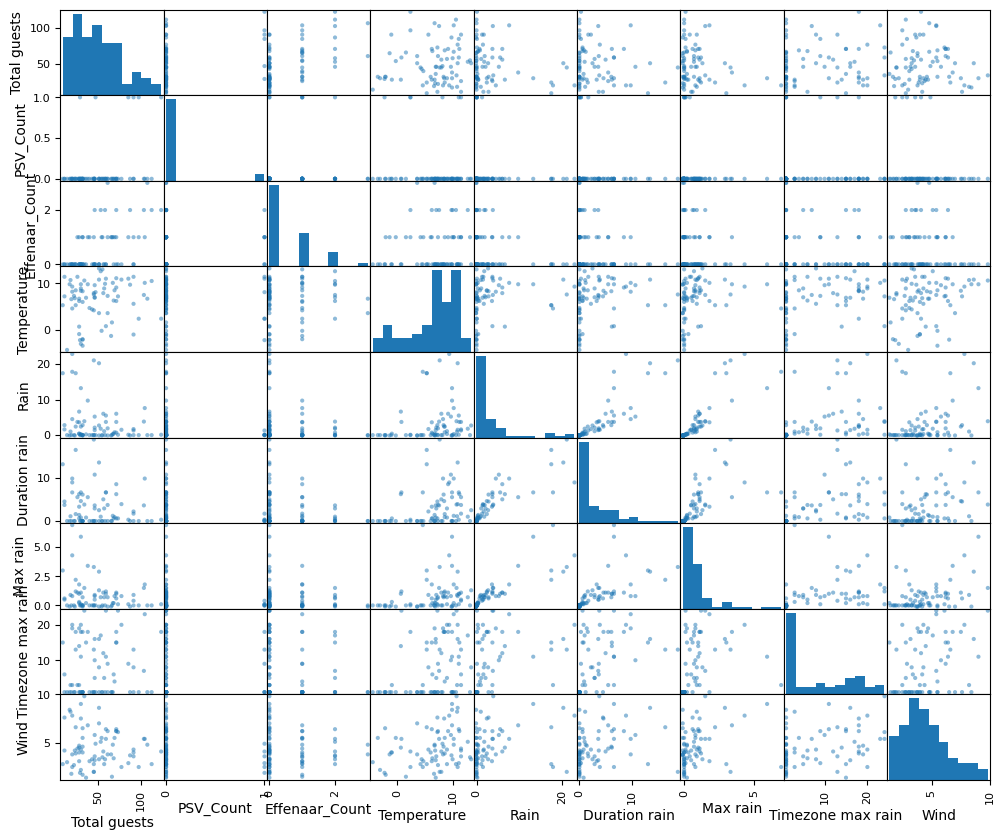

In [145]:
# Create a scatter matrix using Pandas
pd.plotting.scatter_matrix(finalDf, figsize=(12, 10))
plt.show()

Upon examining the correlation map, we observe significant influences when PSV plays or if there's a concert at the Effenaar, both resulting in increased guest numbers. Additionally, a slight increase in guests is noticed with rising temperatures, although further data across the four seasons is necessary to confirm this trend. Conversely, rain negatively impacts guest numbers, whereas wind shows minimal effect on attendance.

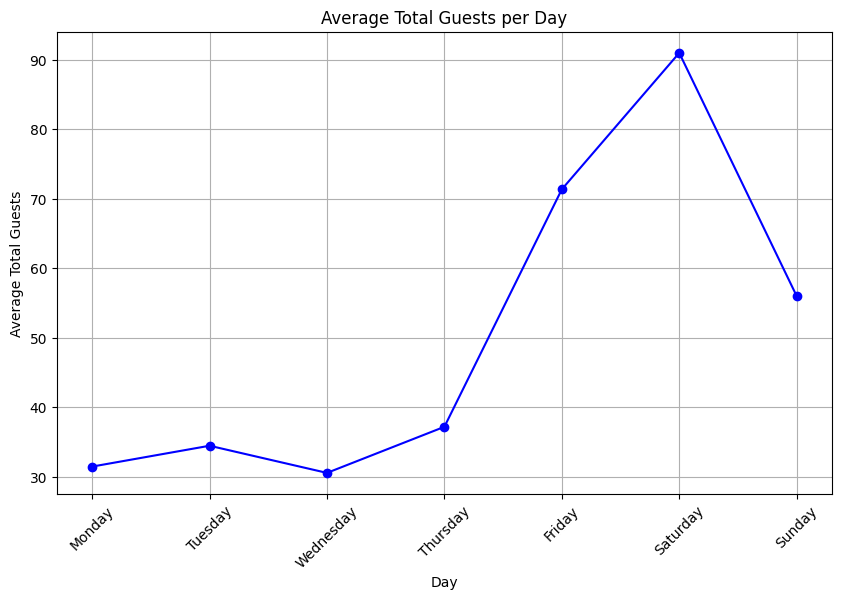

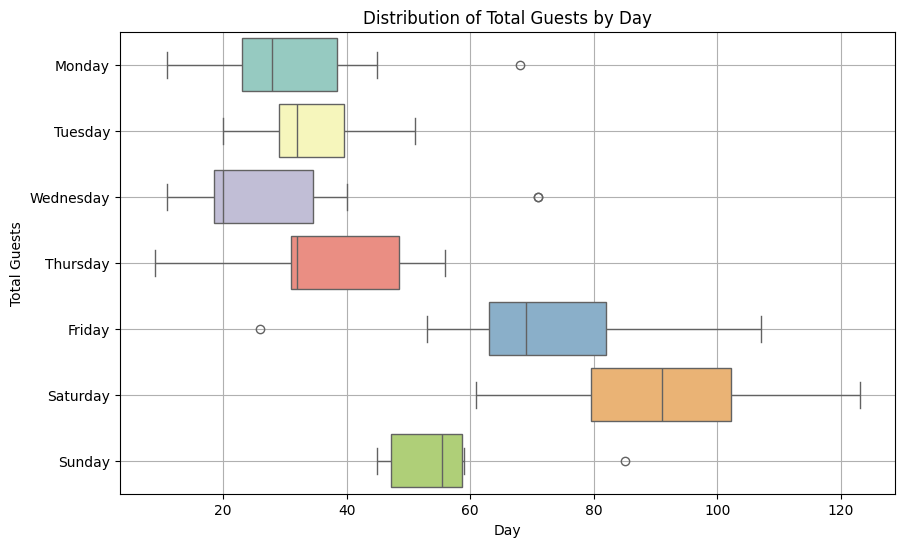

In [146]:
# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to categorical data type with the defined order
finalDf['Day'] = pd.Categorical(finalDf['Day'], categories=day_order, ordered=True)

# Calculate the average total guests for each day
avg_total_guests_per_day = finalDf.groupby('Day', observed=False)['Total guests'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
avg_total_guests_per_day.plot(marker='o', color='b', linestyle='-')
plt.title('Average Total Guests per Day')
plt.xlabel('Day')
plt.ylabel('Average Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total guests', y='Day', data=finalDf, hue='Day', palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Day')
plt.xlabel('Day')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()


The day of the week significantly impacts the flow of visitors, with Saturdays emerging as the busiest, closely followed by Fridays. Sundays also tend to be bustling, albeit to a lesser extent. Conversely, weekdays witness noticeably fewer patrons, marking a quieter period for business.

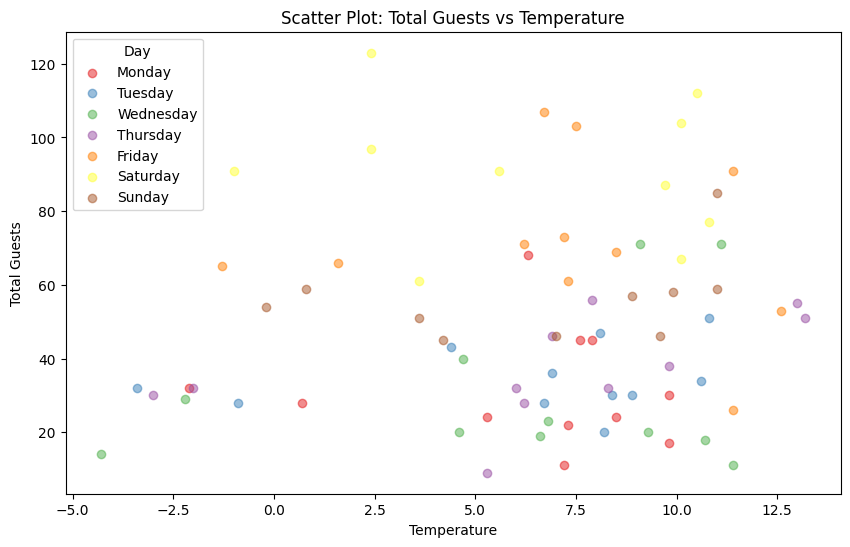

In [147]:
# Create a scatter plot with colors based on the type of day
plt.figure(figsize=(10, 6))
for day, color in zip(day_order, sns.color_palette('Set1', len(day_order))):
    plt.scatter(finalDf[finalDf['Day'] == day]['Temperature'], 
                finalDf[finalDf['Day'] == day]['Total guests'], 
                alpha=0.5, label=day, color=color)
plt.title('Scatter Plot: Total Guests vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Guests')
plt.legend(title='Day')
plt.show()

### Data Preparation

Currently, there isn't much data cleaning required as there are no missing or corrupted values. However, as the dataset expands along with the number of features, it will become necessary to implement data cleaning procedures.

In [148]:
finalDf.isna().sum()

Date                 0
Day                  0
Total guests         0
PSV_Count            0
Effenaar_Count       0
Temperature          0
Rain                 0
Duration rain        0
Max rain             0
Timezone max rain    0
Wind                 0
dtype: int64

## Phase 3 Predictions

### 🛠️ Preprocessing

#### 💡 Feature selection

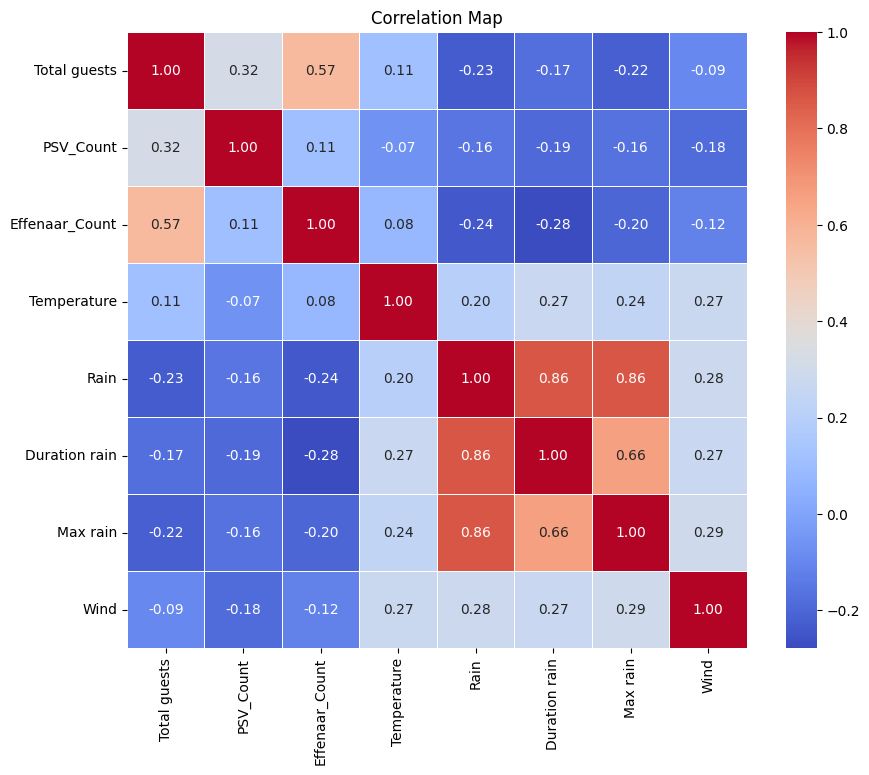

In [149]:
# Combine the relevant columns into a new DataFrame for correlation analysis
correlation_df = finalDf[['Total guests', 'PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Wind']]

# Compute the correlation matrix
correlation_matrix = correlation_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

In [150]:
# Encode the 'Day' column into numerical values
day_encoded = finalDf['Day'].cat.codes

# Calculate the correlation between 'Day' and 'Total guests'
day_guests_correlation = day_encoded.corr(finalDf['Total guests'])

print("Correlation between Day and Total guests:", day_guests_correlation)

Correlation between Day and Total guests: 0.6001342884618628


As of now, the most crucial features are the type of day, with Effenaar events showing the highest correlation. It's important to note that these observations may change over time, but for testing purposes, this setup suffices.

In [151]:
# Define features and target variables
features = ["Day", "Effenaar_Count"]
target = "Total guests"

X = finalDf[features]
y = finalDf[target]

#### 🪓 Splitting into train/test

Before the model can be trained, a little part of the data is to be put aside for testing purposes. The reasoning here is that the model trains with, for example 80% of the data available, and the other 20% is used to ask it to predict the target variable for. Because the true target variable of that 20% is known, we can compare the predictions with the ground truth and devise how well the model performs.

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 75 observations, of which 60 are now in the train set, and 15 in the test set.


#### ⚖️ Scaling

For other machine learning algorithms scaling may be needed, however, linear regression can usually do fine without scaling because it will make a mathematically formula to predict the target with, that can adapt to features in different units. However, for visualization purposes it may be required to scale anyway, or plots may look bad. For now, no scaling is applied. 

#### 🆔 Encoding

Given the fact that machine learning algorithms work with only numeric values, often the input data needs to be encoded, which means turning the non-numeric data into numeric representations (codes).

In [153]:
X_train_encoded = pd.get_dummies(X_train, columns=['Day'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Day'], drop_first=True)

### 🧬 Modelling

In this step only the train set is used to fit the model, which in this case uses a Linear Regression algorithm named [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). And after that the test set is used to calculate the model's score, in other words how well it performs. For regression problems the score is provided as the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) denoted *R²*, which is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(X_train_encoded, y_train)
score = model.score(X_test_encoded, y_test)
print("R²:", score)

R²: 0.7711858951097371


### 🔬 Evaluation

Now, for each in the test set the model makes a prediction of the total guests. Since the true total guest is known, it is then possible to compare the truth with the prediction and calculate an error from that, meaning *"how far away is the prediction from the truth?"*. Note that the error is absolute (non-negative), and in this example it is also cast to an integer for legibility reasons.

In [155]:
# Step 1: Make predictions using the trained model on the test data
predictions = model.predict(X_test_encoded)

# Step 2: Create a DataFrame to store the true total guests, predicted total guests, and the error
prediction_overview = pd.DataFrame()
prediction_overview["truth"] = y_test
prediction_overview["prediction"] = predictions

# Step 3: Calculate the absolute error
prediction_overview["error"] = prediction_overview["truth"] - prediction_overview["prediction"]
prediction_overview["error"] = abs(prediction_overview["error"]).astype(int)

# Step 4: Reset the index of the DataFrame
prediction_overview = prediction_overview.reset_index(drop=True)

# Display the prediction overview DataFrame
print(prediction_overview)

    truth  prediction  error
0      46   68.967072     22
1      91   82.904182      8
2      36   34.300000      1
3      61   70.413171      9
4      51   59.032928      8
5      46   59.032928     13
6      59   59.032928      0
7      57   59.032928      2
8      77   82.904182      5
9      28   32.000000      3
10     23   32.451762      9
11     45   64.000000     19
12     11   32.451762     21
13     30   32.000000      1
14    112   92.838327     19


<Axes: xlabel='predicted amount', ylabel='true amount'>

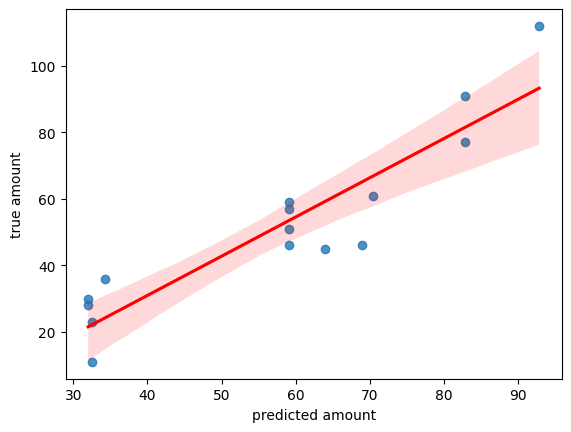

In [156]:
plot = sns.regplot(y=y_test.values.flatten(), x=predictions.flatten(), line_kws={"color": "r"})
plot.set_xlabel("predicted amount")
plot.set_ylabel("true amount")
plot

In [157]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
import io, math

me = max_error(y_test, predictions)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 23
Root Mean Squared Error: 13


#### 🗳️ Conclusion
The first model, even though it was quite basic and used only a few factors, showed some good results. It predicted about 77% of the variation in the number of guests accurately, which is a decent start. It means that the type of day and the number of events at Effenaar have a noticeable effect on how many guests show up.

To make our predictions even better, new things have to be tried. First, more factors could be addded to the model, like weather conditions or special occasions happening nearby. Also, getting more data would help. The more information our model has, the smarter it gets.

Trying different ways of making predictions is also important. The first model was pretty simple, but there are other methods out there that might work better for the data.

So, while the first model did okay, there's still lots of room to make it better. By adding more factors, getting more data, and trying different methods, we hope to build a model that can predict the number of guests even more accurately in the future.